# Homework 2
Rémi Bédard-Couture (20140884)
and
Vincent Morissette-Thomas (890261)

IFT6390 Fundamentals of Machine Learning

# Imports

In [1]:
from IPython.display import Latex

import numpy as np
import pandas as pd
from sklearn.preprocess.Onehotencoder

#from math import sin
import matplotlib.pyplot as plt


#fix the random seed for testing (deterministic output)
seed=0


ModuleNotFoundError: No module named 'sklearn.preprocess'

# Q1 Linear and non-linear regularized regression

## 1.1 Linear Regression

Lets consiser a training set $D_n = \{ (x^{(1)},t^{(1)}), ...,(x^{(n)},t^{(n)}) \}$ with $ x^{(i)} \in \mathbb{R}^d$ and $t^{(i)} \in \mathbb{R}$.

###1.1.1

Lets consider the model

\begin{equation}
f(x) = \textbf{w}^T \textbf{x} + b
\end{equation}

The parameters are $b \in \mathbb{R}$ and $\textbf{w} \in \mathbb{R}^d$ such that $b$ is the constant bias and that $\textbf{w}$ is the vector of regression coefficients.

### 1.1.2

Consider $L((x,t),f) = (f(x)-t)^2$ and $\hat{R}$ the empirical risk on $D_n$

\begin{align}
\hat{R}(L,D_n) &= \sum_{x,t \in D_n} L((x,t), f) \\
&=\sum_{i=1}^{n}(f(x^{(i)}) - t^{(i)})^2 \\
&=\sum_{i=1}^{n}(w^T x^{(i)} + b - t^{(i)})^2
\end{align}

### 1.1.3

We want the parameter $\theta = \{w,b\}$ that minimize $\hat{R}$, in other words

\begin{align}
\theta^{*} = \operatorname*{arg\,min}_{\theta} \hat{R}(L,D_n)
\end{align}

Where $\hat{R}$ and $L$ are as defined previously.

### 1.1.4

The gradient of the empirical risk $\hat{R}$ with respect to $\theta = \{ b, w\}$ is

\begin{align}
\nabla\hat{R} = \frac{\partial \hat{R}}{\partial \theta}
\end{align}

Where

\begin{align}
\frac{\partial \hat{R}}{\partial b} &= \frac{\partial}{\partial b} \sum_{i=1}^{n}(w^T x^{(i)}+b-t^{(i)})^2 \\
&=\sum_{i=1}^{n}2(w^T x^{(i)}+b-t^{(i)})
\end{align}

and for a specific $w_k, k\in\{ 1,...,d\}$

\begin{align}
\frac{\partial \hat{R}}{\partial w_k} &= \frac{\partial}{\partial w_k} \sum_{i=1}^{n}(w^T x^{(i)}+b-t^{(i)})^2 \\
&=\sum_{i=1}^{n}2 x^{(i)}_k(w^T x^{(i)}+b-t^{(i)})
\end{align}


### 1.1.5

The gradient of the empirical risk points in the direction where the square error of the model is ascending the most. ********** maybe more details ************

## 1.2 Ridge Regression

Consider $\tilde{R}=\hat{R} + \lambda \Omega(\theta)$ where $\lambda \ge 0$ and $\Omega (\theta) = \|w\|^2 = \sum_{k=1}^{d}w_k^2$

### 1.2.1

The gradient of the regularized empirical risk $\tilde{R}$ with respect to $\theta = \{ b, w\}$ is

\begin{align}
\nabla\tilde{R} = \frac{\partial \tilde{R}}{\partial \theta}
\end{align}

Where

\begin{align}
\frac{\partial \tilde{R}}{\partial b} &= \frac{\partial}{\partial b} \sum_{i=1}^{n}(w^T x^{(i)}+b-t^{(i)})^2 + \lambda \sum_{k=1}^{d}w_k^2\\
&=\sum_{i=1}^{n}2(w^T x^{(i)}+b-t^{(i)})
\end{align}

The expression of the gradient with respect to $b$ remains unchanged. Now for a specific $w_k, k\in\{ 1,...,d\}$

\begin{align}
\frac{\partial \tilde{R}}{\partial w_k} &= \frac{\partial}{\partial w_k} \sum_{i=1}^{n}(w^T x^{(i)}+b-t^{(i)})^2 + \lambda \sum_{k=1}^{d}w_k^2\\
&=\sum_{i=1}^{n}2 x^{(i)}_k(w^T x^{(i)}+b-t^{(i)}) + 2 \lambda w_k
\end{align}


### 1.2.2

The pseudo-code for the training algorithm of the ridge regression is :

For a fixed $\eta$, $\epsilon$ and a maximum number of  iterations (max_iter), initialize $w$ and $b$ randomly \\


> Until convergence ($ \| \frac{\partial \tilde{R}}{\partial \theta_i}(\theta_i) \| \le \epsilon$) or max_iter \\

> $ b = b - \eta \nabla_b\tilde{R}$ \\
$ w = w - \eta \nabla_w\tilde{R}$ \\

### 1.2.3

Consider the matrix $X=D_n$

\begin{align}
X =
\begin{bmatrix}
    x^{(1)}_1  & \dots  & x^{(1)}_d \\
    \vdots  & \ddots & \vdots \\
    x^{(n)}_1 & \dots  & x^{(n)}_d
\end{bmatrix}
\end{align}

and the vector $t$

\begin{align}
t =
\begin{bmatrix}
    t^{(1)} \\
    \vdots  \\
    t^{(n)}
\end{bmatrix}
\end{align}

Consider the matrix $A$ and the vectors $x$ and $y$ as $y=Ax$. Lets recall some properties of the derivation of a matrix with respect to a vector,

\begin{align}
\frac{\partial Ax}{\partial x}= A, \quad \frac{\partial y^TAx}{\partial x}= y^TA, \quad \frac{\partial x^TAx}{\partial x}= x^T(A + A^T)
\end{align}


We can write $\tilde{R}(L,D_n) = (Xw-t)^T(Xw-t) + \lambda w^T w$, then the gradient with respect to $w$ becomes

\begin{align}
\frac{\partial \tilde{R}}{\partial w} &= \frac{\partial}{\partial w}\big[ (Xw-t)^T(Xw-t) + \lambda w^T w\big] \\
&= \frac{\partial}{\partial w}\big[ w^T X^T X w -w^T X^T t - t^T X w+ t^T t + \lambda w^T w\big] \\
&= \frac{\partial}{\partial w}\big[ w^T X^T X w - 2w^T X^T t + t^T t + \lambda w^T w\big] \\
&=  w^T ((X^T X)^T + X^TX) - 2X^T t + 2\lambda w\\
&= 2w^T X^T X - 2X^T t + 2\lambda w\\
&= 2 X^T Xw - 2X^T t + 2\lambda w\\
\end{align}

### 1.2.4

We set $\frac{\partial \tilde{R}}{\partial w}=0$, then 

\begin{align}
2 X^T Xw - 2X^T t + 2\lambda w &= 0 \\
X^Tt &= X^T X w + \lambda w \\
X^Tt &= (X^T X + \lambda I)w \\
(X^T X + \lambda I)^{-1}X^Tt &= w
\end{align}

If $\lambda = 0$, we get $w=(X^T X)^{-1}X^Tt$ which is the solution to the linear regression. N<d ???

## 1.3 Regression with a fixed non-linear pre-processing

### 1.3.1

For $x \in \mathbb{R}$, the polynomial transformation is

\begin{align}
 \phi_{poly^k}(x)  =
\begin{bmatrix}
    x \\
    x^2 \\
    \vdots  \\
    x^k
\end{bmatrix}
= \tilde{x}
\end{align}

Then the function $\tilde{f}(x) = w^T\tilde{x} + b$

 ### 1.3.2

The parameters are $w \in \mathbb{R}^k$ and $b \in \mathbb{R}$.

### 1.3.3

Set $d =2$, then $x \in \mathbb{R}^2$ where $x=(x_1, x_2)^t$

\begin{align}
 \phi_1(x)  = x =(x_1, x_2)^t
\end{align}

\begin{align}
 \phi_2(x) =(x_1, x_2, x_1x_2, x^{2}_1,x^{2}_2)^t
\end{align}

\begin{align}
 \phi_3(x) =(x_1, x_2, x_1x_2, x^{2}_1,x^{2}_2, x^{2}_1x_2, x^{2}_2x_1, x^3_1, x^{3}_2)^t
\end{align}

### 1.3.4

The dimensionality of $\phi_k(x)$ where $x \in \mathbb{R}^d$ and the $\mid \cdot \mid $ means the cardinality, then

\begin{align}
\mid \phi_k(x)\mid = \mid\phi_{k-1}\mid + (k+d)
\end{align}

where $\mid \phi_1(x)\mid = d$. Of course, we have to assume that $k > 0$ and $d \ge 1$.

#Q2

The following code was written in Google Colaboratory, an online editor for Jupyter Python notebooks.
https://colab.research.google.com/
Simply run the notebook!

##Q2.1

In [0]:
class Regression_gradient:
    def __init__(self, learning_rate=0, step_size=0.001, max_steps=20):
        self.learning_rate = learning_rate
        self.step_size = step_size
        self.max_steps = max_steps  
        

    #train to learn the weights(w) and bias(b)
    def train(self, train_data):
        """
        Train the model on a data matrix by doing a maximum of max_steps epochs.
        (Note: One epoch is one pass over the data set.)
        
        Parameters
        ----------
        train_data : array
            matrix of dimension (n, d+1) where n is the number of samples
            and d is the number of dimensions of each sample. Each line contains
            one input in the d first columns and the label in the column d+1.
        """
        
        #Remove label from data
        unlabeled_train_data= np.delete(train_data, -1, 1)
        labels=[data[-1] for data in train_data]
        
        # 1) Parameters Initialization
        # Initialize the weigths to small values and the bias to 0
        
        #get dimension from size of data
        self.dimension=len(unlabeled_train_data[0])
        stdv = 1. / np.sqrt(self.dimension)        
        np.random.seed(seed)
        self.weights = np.random.uniform(0,stdv,self.dimension)
        self.bias = 0
         
        # 2) Training
        iteration = 0
        while iteration < self.max_steps:           
            #computing derivative(ERM)
            total=0
            for x,y in zip(unlabeled_train_data,labels):
              #ftheta=np.inner(self.weights,x)+self.bias              
              #loss=np.power(ftheta-y,2)
              #compute partial derivative
              #partial_deriv=2*(np.inner(self.weights,x)+self.bias-y)*x
              total+=2*(np.inner(self.weights,x)+self.bias-y)*x
              
            #regul=np.sum(np.power(self.weights,2))
            #derivative of regularization term ======> 2*d*theta
            total+=self.learning_rate*2*len(self.weights)*self.weights
       
            #W=W-step_size*derivative(ERM)
            self.weights=self.weights-self.step_size*total
            self.bias=self.bias-self.step_size*total
                      
            iteration += 1
        
    def poly_transform(self,x, degree):
      #stdardize x to a scalar
      if isinstance(x, np.ndarray):
        std_x=x[0]
      else:
        std_x=x
        
      tmp=[]
      for deg in range(degree):#From 0 to degree-1        
        tmp.append(np.power(std_x,deg+1))#that is why we +1 here
        
      return tmp
      
        #train to learn the weights(w) and bias(b)
    def train_poly(self, train_data, degree_poly):       
        #Remove label from data
        unlabeled_train_data= np.delete(train_data, -1, 1)
        labels=[data[-1] for data in train_data]
        
        #transform data to higher dimension:
        new_data=[]
        for x in unlabeled_train_data:
          tmp=self.poly_transform(x,degree_poly)
          new_data.append(tmp)     
          
        
        # 1) Parameters Initialization
        # Initialize the weigths to small values and the bias to 0
        
        #get dimension from size of data
        self.dimension=len(new_data[0])
        
        stdv = 1. / np.sqrt(self.dimension)        
        np.random.seed(seed)
        self.weights = np.random.uniform(0,stdv,self.dimension)
        self.bias = 0
         
        # 2) Training
        
        #compute gradient descent:
        #https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html
        
        iteration = 0
        while iteration < self.max_steps:           
            #computing derivative(ERM)
            total=0
            for x,y in zip(new_data,labels):
              #print("w:",self.weights)
              #print("x:",x)
              tmp=np.inner(self.weights,x)
              tmp2=(tmp+self.bias-y)
              total+=2*np.inner(tmp2,x)
              
            #derivative of regularization term ======> 2*d*theta
            total+=self.learning_rate*2*len(self.weights)*self.weights
       
            #W=W-step_size*derivative(ERM)
            self.weights=self.weights-self.step_size*total
            self.bias=self.bias-self.step_size*total
                      
            iteration += 1
        
    def predict(self,test_data):
      y=[]
      for x in test_data:
        tmp=np.inner(self.weights,x)+self.bias
        y.append(tmp[0])
      return y
    
    def predict_poly(self,test_data, degree_poly):
      y=[]
      
      #transform data to higher dimension:
      new_data=[]
      for x in test_data:
        tmp=self.poly_transform(x,degree_poly)
        new_data.append(tmp)     

      
      print("weights:",self.weights)
      print("bias:",self.bias)
      for x in new_data:
        tmp=np.inner(self.weights,x)#+self.bias
        y.append(tmp)#[0])
      return y
        
    def compute_predictions(self, test_data):
        """
        Predict the class of each sample in a test matrix
        
        Parameters
        ----------
        test_data : array
            matrix of shape (n,d) where n is the number of samples
            and d is the number of dimensions.
            
        Returns
        -------
        array
            array of shape (n) filled with predicted classes (-1 or 1)
        """
  
        # 1) Calculate the class predicted by the perceptron for each sample
        predictions = np.zeros(test_data.shape[0])
        # Fill here
        
        return predictions

##Q2.2

In [165]:
def h(x):
  return np.sin(x)+0.3*x

n=15
lb=-5.0
ub=5.0
Dn=[]

np.random.seed(seed)
Points=np.random.uniform(lb,ub,n)

for x in Points:  
  Dn.append([x,h(x)])
  
Dn

[[0.48813503927324753, 0.6154200663411161],
 [2.151893663724195, 1.4814288786366496],
 [1.027633760716439, 1.1643685339201661],
 [0.4488318299689684, 0.5685629112400928],
 [-0.7634520066109527, -0.9204550761150492],
 [1.4589411306665614, 1.431433066519763],
 [-0.6241278873730751, -0.7716281655587927],
 [3.917730007820797, 0.47479082995645483],
 [4.636627605010293, 0.3938568020507026],
 [-1.1655848117422227, -1.2686944792305235],
 [2.917250380826646, 1.0976402795329485],
 [0.28894919752904435, 0.37162990164450393],
 [0.6804456109393229, 0.8332731397689582],
 [4.25596638292661, 0.3791549734018761],
 [-4.289639418021131, -0.3749274979929952]]

##Q2.3

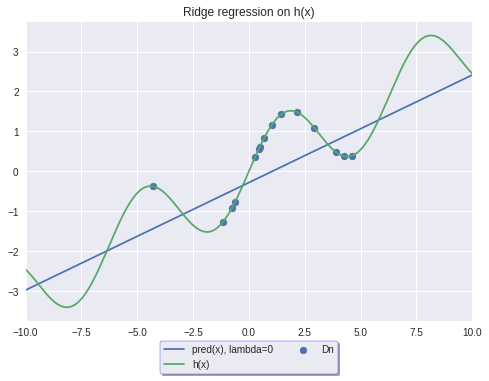

In [166]:
#Lambda = 0
#Produce clear graph with legend
# xlim:-10;10
#Show datapoints Dn,h(x),regression function

#Learn the function with ridge regression
#hyper-parameters
learning_rate = 0
step_size=0.001
max_steps=20

# Instantiate and train the model
model_ridgereg_lambda0 = Regression_gradient(learning_rate,step_size,max_steps)
model_ridgereg_lambda0.train(Dn)


x_min=-10.0
x_max=10.0

x_d = np.linspace(x_min, x_max, 1000)

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.scatter([x[0] for x in Dn], [x[1] for x in Dn],label='Dn')
ax1.plot(x_d,model_ridgereg_lambda0.predict(x_d),label='pred(x), lambda=0')
ax1.plot(x_d,h(x_d),label='h(x)')
ax1.set_title("Ridge regression on h(x)")
ax1.set_xlim(-10.0, 10.0)
leg =ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),  shadow=True, ncol=2,frameon=True)
leg.get_frame().set_edgecolor('b')
plt.show()


##Q2.4

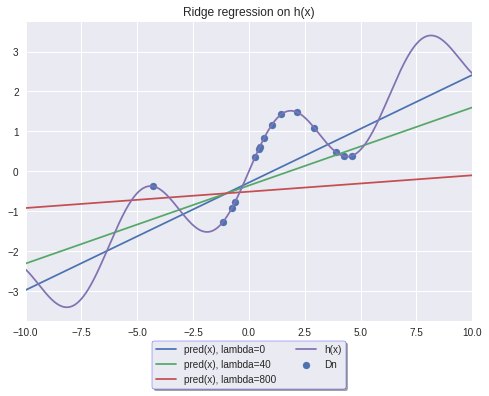

In [167]:
# Instantiate and train the model, intermediate lambda
model_ridgereg_lambdaMid = Regression_gradient(40,step_size,max_steps)
model_ridgereg_lambdaMid.train(Dn)

# Instantiate and train the model, extreme lambda
model_ridgereg_lambdaHigh = Regression_gradient(800,step_size,max_steps)
model_ridgereg_lambdaHigh.train(Dn)

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.scatter([x[0] for x in Dn], [x[1] for x in Dn],label='Dn')
ax1.plot(x_d,model_ridgereg_lambda0.predict(x_d),label='pred(x), lambda=0')
ax1.plot(x_d,model_ridgereg_lambdaMid.predict(x_d),label='pred(x), lambda=40')
ax1.plot(x_d,model_ridgereg_lambdaHigh.predict(x_d),label='pred(x), lambda=800')
ax1.plot(x_d,h(x_d),label='h(x)')
ax1.set_title("Ridge regression on h(x)")
ax1.set_xlim(-10.0, 10.0)
leg =ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),  shadow=True, ncol=2,frameon=True)
leg.get_frame().set_edgecolor('b')
plt.show()


##Q2.5

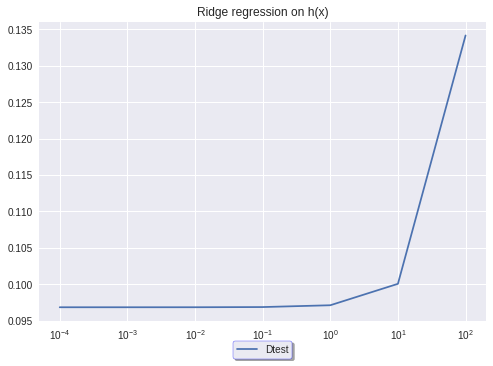

In [168]:
n_test=100
Dtest=[]

np.random.seed(seed)
Points_test=np.random.uniform(lb,ub,n_test)

for x in Points_test:  
  Dtest.append([x,h(x)])
  
#Train model with different lambda values
lambdas=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
errors=[]
models={}

for x_learning_rate in lambdas:
  tmp_model_ridgereg = Regression_gradient(x_learning_rate,step_size,max_steps)
  tmp_model_ridgereg.train(Dn)
  #Compute quadratic loss (and store it in the object)
  predictions=tmp_model_ridgereg.predict([x[0] for x in Dn])
  total_error=0
  for x_test,pred in zip(Dtest,predictions):
    tmp_error=x_test[1]-pred
    total_error+=np.power(tmp_error,2)
  mse=total_error/n_test
  errors.append(mse)
  models[x_learning_rate]=[tmp_model_ridgereg, mse]
  
#print("lamb:",lambdas)
#print("err:",errors)
  
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.semilogx(lambdas, errors,label='Dtest')
#ax1.semilogx(t, np.sin(2*np.pi*t))
#ax1.scatter([x[0] for x in Dtest], [x[1] for x in Dtest],label='Dtest')
#ax1.plot(x_d,model_ridgereg_lambda0.predict(x_d),label='pred(x), lambda=0')
#ax1.plot(x_d,model_ridgereg_lambdaMid.predict(x_d),label='pred(x), lambda=40')
#ax1.plot(x_d,model_ridgereg_lambdaHigh.predict(x_d),label='pred(x), lambda=800')
#ax1.plot(x_d,h(x_d),label='h(x)')
ax1.set_title("Ridge regression on h(x)")
#ax1.set_xlim(-10.0, 10.0)
leg =ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),  shadow=True, ncol=2,frameon=True)
leg.get_frame().set_edgecolor('b')
plt.show()

##Q2.6

FIX BIAS LEARNING (SHOULD BE 1 DIMENSIONAL)
('w:', array([0.38806975, 0.50571525]))
('x:', [0.48813503927324753, 0.2382758165662949])
('w:', array([0.38806975, 0.50571525]))
('x:', [2.151893663724195, 4.630646339976339])
('w:', array([0.38806975, 0.50571525]))
('x:', [1.027633760716439, 1.0560311461642113])
('w:', array([0.38806975, 0.50571525]))
('x:', [0.4488318299689684, 0.20145001159329298])
('w:', array([0.38806975, 0.50571525]))
('x:', [-0.7634520066109527, 0.5828589663982902])
('w:', array([0.38806975, 0.50571525]))
('x:', [1.4589411306665614, 2.1285092227506244])
('w:', array([0.38806975, 0.50571525]))
('x:', [-0.6241278873730751, 0.3895356197967779])
('w:', array([0.38806975, 0.50571525]))
('x:', [3.917730007820797, 15.348608414179543])
('w:', array([0.38806975, 0.50571525]))
('x:', [4.636627605010293, 21.498315547543488])
('w:', array([0.38806975, 0.50571525]))
('x:', [-1.1655848117422227, 1.3585879533641527])
('w:', array([0.38806975, 0.50571525]))
('x:', [2.917250380826646,

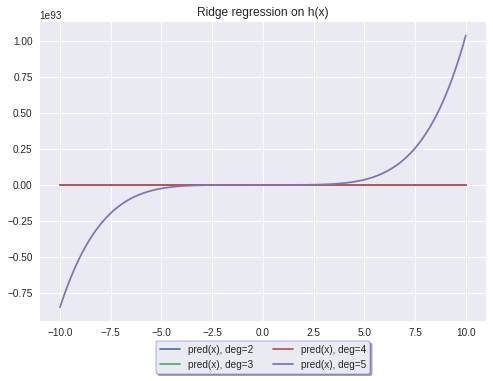

In [169]:
#Transform Dn to higher dimension
learning_rate=0.1


print("FIX BIAS LEARNING (SHOULD BE 1 DIMENSIONAL)")

#step_size=0.0000001
#order=2
model_ridgereg_poly2 = Regression_gradient(learning_rate,step_size,max_steps)
model_ridgereg_poly2.train_poly(Dn,2)

#order=3
model_ridgereg_poly3 = Regression_gradient(learning_rate,step_size,max_steps)
model_ridgereg_poly3.train_poly(Dn,3)

#order=4
model_ridgereg_poly4 = Regression_gradient(learning_rate,step_size,max_steps)
model_ridgereg_poly4.train_poly(Dn,4)

#order=4
model_ridgereg_poly5 = Regression_gradient(learning_rate,step_size,max_steps)
model_ridgereg_poly5.train_poly(Dn,5)


fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
#ax1.scatter([x[0] for x in Dn], [x[1] for x in Dn],label='Dn')
ax1.plot(x_d,model_ridgereg_poly2.predict_poly(x_d,2),label='pred(x), deg=2')
ax1.plot(x_d,model_ridgereg_poly3.predict_poly(x_d,3),label='pred(x), deg=3')
ax1.plot(x_d,model_ridgereg_poly4.predict_poly(x_d,4),label='pred(x), deg=4')
ax1.plot(x_d,model_ridgereg_poly5.predict_poly(x_d,5),label='pred(x), deg=5')

#ax1.plot(x_d,h(x_d),label='h(x)')
ax1.set_title("Ridge regression on h(x)")
#ax1.set_xlim(-10.0, 10.0)
#ax1.set_ylim(-4.0, 400.0)
leg =ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),  shadow=True, ncol=2,frameon=True)
leg.get_frame().set_edgecolor('b')
plt.show()